In [12]:
import warnings
warnings.filterwarnings('ignore')
import torch
import os
from pprint import pprint
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
# from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
# Import things that are needed generically
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool, StructuredTool, tool

from langchain_core.utils.function_calling import convert_to_openai_function
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage

from langchain import hub
from langchain.agents import AgentExecutor, create_openai_tools_agent

from typing import Literal, Optional
from langchain.output_parsers import PydanticOutputParser

import tool_pool as tp

dotenv_path = '/Users/minkyuramen/Desktop/project/env'
load_dotenv(dotenv_path)

api_key = os.getenv("SEMANTIC_SCHOLAR_API_KEY")
openai_key = os.getenv("OPENAI_API_KEY")

In [13]:
# load model
model = ChatOpenAI(model="gpt-3.5-turbo")
# load tool
tools = [tp.loadpaper, tp.recommendpaper, tp.code_matching]
# load Agent prompt
prompt = hub.pull("hwchase17/openai-tools-agent")

In [14]:
# Choose the LLM that will drive the agent
# Only certain models support this
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Construct the OpenAI Tools agent
agent = create_openai_tools_agent(llm, tools, prompt)
# Create an agent executor by passing in the agent and tools
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# loadpaper

In [15]:
# output = agent_executor.invoke({"input": "explain about the math expression about the Filtering api calls in the paper 'ToolFormer : Language Models Can Teach Themselves to Use Tools' 한글로 말해줘"})
output = agent_executor.invoke({"input": "'ToolFormer : Language Models Can Teach Themselves to Use Tools'에서 api calls를 filtering 하는 파트를 수식과 함께 설명해줘. 한글로 대답해줘"})



> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'title': "'ToolFormer : Language Models Can Teach Themselves to Use Tools'"}`


Here is the title and section of the paper in HTML
title
Toolformer: Language Models Can Teach Themselves to Use Tools
sections
          Abstract
  1 Introduction
  2 Approach
        Sampling API Calls
        Executing API Calls
        Filtering API Calls
        Model Finetuning
        Inference
  3 Tools
        Question Answering
        Calculator
        Wikipedia Search
        Machine Translation System
        Calendar
  4 Experiments
    4.1 Experimental Setup
        Dataset Generation
        Model Finetuning
        Baseline Models
    4.2 Downstream Tasks
      4.2.1 LAMA
      4.2.2 Math Datasets
      4.2.3 Question Answering
      4.2.4 Multilingual Question Answering
      4.2.5 Temporal Datasets
    4.3 Language Modeling
    4.4 Scaling Laws
  5 Analysis
        Decoding Strategy
        Data Quality
  6 Related Wor

In [16]:
pprint(output['output'])

("'ToolFormer : Language Models Can Teach Themselves to Use Tools' 논문에서 API "
 'calls를 filtering하는 파트는 다음과 같은 수식과 설명으로 이루어져 있습니다:\n'
 '\n'
 '1. **Sampling API Calls**:\n'
 '   - 각 API에 대해 LM(Language Model)이 예제를 주석 달아 API 호출을 어노테이트하도록 하는 프롬프트 P(𝐱)를 '
 '작성합니다.\n'
 '   - LM이 API 호출을 시작할 위치에 대한 확률 pi를 계산하여 상위 k개의 후보 위치를 샘플링합니다.\n'
 '   - 각 위치 i에 대해 접두사로 [P(𝐱), x1, ..., xi-1, <API>]를 주고 LM에서 API 호출을 생성하여 최대 '
 'm개의 API 호출을 얻습니다.\n'
 '\n'
 '2. **Executing API Calls**:\n'
 '   - LM이 생성한 모든 API 호출을 실행하여 해당 결과를 얻습니다.\n'
 '   - API 호출에 대한 응답은 단일 텍스트 시퀀스여야 합니다.\n'
 '\n'
 '3. **Filtering API Calls**:\n'
 '   - API 호출의 위치 i와 해당 API의 응답 ri를 고려합니다.\n'
 '   - 가중치 시퀀스 (wi | i ∈ ℕ)에 대한 가중 교차 엔트로피 손실을 계산하고 두 가지 다른 손실을 비교합니다.\n'
 '   - API 호출 및 결과를 LM에 주어 손실을 줄이는지 확인하고 필터링 임계값 τf를 기준으로 API 호출을 유지합니다.\n'
 '\n'
 "이러한 과정을 통해 'ToolFormer : Language Models Can Teach Themselves to Use Tools' "
 '논문에서 API calls를 filtering하는 방법이 설명되어 있습니다.')


In [17]:
# output = agent_executor.invoke({"input": "summary the method of the paper 'Large Language Model Connected with Massive APIs' 한글로 말해줘"})
output = agent_executor.invoke({"input": "'Large Language Model Connected with Massive APIs'논문의 method를 요약해 설명해줘"})



> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'title': "'Large Language Model Connected with Massive APIs'", 'sections': ['Method']}`



3 Methodology
Figure 3: Gorilla: A system for enabling LLMs to interact with APIs. The upper half represents the training procedure as described in Sec 3. This is the most exhaustive API data-set for ML to the best of our knowledge. During inference (lower half), Gorilla supports two modes - with retrieval, and zero-shot. In this example, it is able to suggest the right API call for generating the image from the user’s natural language query.

In this section, we describe APIBench, a comprehensive benchmark constructed from TorchHub, TensorHub, and HuggingFace API Model Cards. We begin by outlining the process of collecting the API dataset and how we generated instruction-answer pairs. We then introduce Gorilla, a novel training paradigm with a information–retriever incorporated into the training and inference pipelines. Finall

In [48]:
pprint(output['output'])

("'Large Language Model Connected with Massive APIs' 논문의 Methodology 섹션은 다음과 "
 '같이 요약됩니다:\n'
 '\n'
 '- **Dataset Collection**: APIBench는 TorchHub, TensorHub 및 HuggingFace API '
 'Model Cards에서 구성된 포괄적인 벤치마크로 구축되었습니다. API 데이터셋 수집 및 명령-응답 쌍 생성 과정을 개요하며, API '
 '문서 및 명령 생성에 대한 세부 내용을 제공합니다.\n'
 '\n'
 '- **API Documentation**: HuggingFace 플랫폼에는 약 203,681개의 모델이 호스팅되어 있습니다. 이 중 '
 '일부는 문서화가 미흡하거나 의존성이 없거나 모델 카드에 정보가 없는 경우가 있습니다. 이를 걸러내기 위해 각 도메인의 상위 20개 모델을 '
 '선택합니다. 이후, Torch Hub, TensorFlow Hub에서도 유사한 작업을 수행하여 총 1,645개의 API 호출을 '
 '얻습니다.\n'
 '\n'
 '- **Instruction Generation**: GPT-4를 활용하여 합성 지시 데이터를 생성합니다. 모델 카드를 JSON 객체로 '
 '변환하여 API 호출에 대한 일반화된 필드를 제공합니다. 이를 통해 API 호출에 대한 지시를 생성하고 API 호출에 대한 학습 데이터를 '
 '확보합니다.\n'
 '\n'
 '- **Gorilla**: Gorilla는 API 호출을 위해 특별히 조정된 LLaMA-7B 모델로, 지시-응답 쌍을 생성하기 위해 '
 'self-instruct를 활용합니다. API 호출에 대한 제약 조건과 함께 API 호출을 처리하는 데 필요한 추가적인 복잡성을 '
 '소개합니다.\n'
 '\n'
 '- **API Call with Constraints**: API 호출은 종종 내재적인 제약 조건을 가지고 있습니다. 이러한 제약 조건은 '
 'LLM이 API 호출의 기능

# recompendpaper

In [18]:
output = agent_executor.invoke({"input": "'Facilitating Large Language Models to Master 16000+ Real-world APIs' 논문 읽기 전에 읽기 좋은 논문 4편 정도 추천해줘"})



> Entering new AgentExecutor chain...

Invoking: `recommendpaper` with `{'query': 'Facilitating Large Language Models to Master 16000+ Real-world APIs', 'rec_type': 'reference', 'rec_num': 4}`


[{'title': 'ReAct: Synergizing Reasoning and Acting in Language Models', 'abstract': 'While large language models (LLMs) have demonstrated impressive capabilities across tasks in language understanding and interactive decision making, their abilities for reasoning (e.g. chain-of-thought prompting) and acting (e.g. action plan generation) have primarily been studied as separate topics. In this paper, we explore the use of LLMs to generate both reasoning traces and task-specific actions in an interleaved manner, allowing for greater synergy between the two: reasoning traces help the model induce, track, and update action plans as well as handle exceptions, while actions allow it to interface with external sources, such as knowledge bases or environments, to gather additional information. We app

In [14]:
pprint(output['output'])

('여기 Facilitating Large Language Models to Master 16000+ Real-world APIs 논문과 '
 '관련된 추천 논문 4편입니다:\n'
 '\n'
 '1. **ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world '
 'APIs**\n'
 '   - **요약**: 현재의 대형 언어 모델(Large Language Models, LLMs)은 기본 언어 작업에 대한 지시 튜닝에 '
 '중점을 두고 있지만, 도구 사용 영역을 무시합니다. 이 논문에서는 이 간극을 메우기 위해 ToolLLM을 소개하며, 데이터 구축, 모델 '
 '훈련 및 평가를 포함하는 일반적인 도구 사용 프레임워크를 제시합니다.\n'
 '   - **발행일**: -\n'
 '   - **인용 횟수**: -\n'
 '\n'
 '2. **Generative agent-based modeling with actions grounded in physical, '
 'social, or digital space using Concordia**\n'
 '   - **요약**: Concordia는 GABM을 구축하고 작업하는 데 도움을 주는 라이브러리로, LLM을 사용하여 상황에 상식을 '
 '적용하고 행동을 생성합니다.\n'
 '   - **발행일**: -\n'
 '   - **인용 횟수**: -\n'
 '\n'
 '3. **ReAct: Synergizing Reasoning and Acting in Language Models**\n'
 '   - **요약**: ReAct는 LLM이 추론 트레이스와 작업별 작업을 생성하도록 허용하여 두 가지 간의 상호 작용을 허용합니다.\n'
 '   - **발행일**: 2022년 10월 6일\n'
 '   - **인용 횟수**: 185\n'
 '\n'
 '4. **Self-Instruct: Aligning Language Models with Self-G

In [6]:
output = agent_executor.invoke({"input": "'Facilitating Large Language Models to Master 16000+ Real-world APIs' 논문 읽기 전에 읽기 좋은 논문  3개 정도 추천해줘"})



> Entering new AgentExecutor chain...

Invoking: `recommendpaper` with `{'query': 'Facilitating Large Language Models to Master 16000+ Real-world APIs', 'rec_type': 'reference', 'rec_num': 3}`


[{'title': 'ReAct: Synergizing Reasoning and Acting in Language Models', 'abstract': 'While large language models (LLMs) have demonstrated impressive capabilities across tasks in language understanding and interactive decision making, their abilities for reasoning (e.g. chain-of-thought prompting) and acting (e.g. action plan generation) have primarily been studied as separate topics. In this paper, we explore the use of LLMs to generate both reasoning traces and task-specific actions in an interleaved manner, allowing for greater synergy between the two: reasoning traces help the model induce, track, and update action plans as well as handle exceptions, while actions allow it to interface with external sources, such as knowledge bases or environments, to gather additional information. We app

In [20]:
output = agent_executor.invoke({"input": "'Facilitating Large Language Models to Master 16000+ Real-world APIs' 논문 읽어봤는데 좋은거 같아. 다음에 읽을 비슷한 논문 추천해줘"})



> Entering new AgentExecutor chain...

Invoking: `recommendpaper` with `{'query': 'Facilitating Large Language Models to Master 16000+ Real-world APIs', 'rec_type': 'citation'}`


[{'title': 'API-Bank: A Comprehensive Benchmark for Tool-Augmented LLMs', 'abstract': "Recent research has demonstrated that Large Language Models (LLMs) can enhance their capabilities by utilizing external tools. However, three pivotal questions remain unanswered: (1) How effective are current LLMs in utilizing tools? (2) How can we enhance LLMs' ability to utilize tools? (3) What obstacles need to be overcome to leverage tools? To address these questions, we introduce API-Bank, a groundbreaking benchmark, specifically designed for tool-augmented LLMs. For the first question, we develop a runnable evaluation system consisting of 73 API tools. We annotate 314 tool-use dialogues with 753 API calls to assess the existing LLMs' capabilities in planning, retrieving, and calling APIs. For the second question, we

In [22]:
output = agent_executor.invoke({"input": "'Facilitating Large Language Models to Master 16000+ Real-world APIs' 논문 읽어봤는데 좋은거 같아. 다음에 읽을 비슷한 논문 4개 정도 추천해줘"})



> Entering new AgentExecutor chain...

Invoking: `recommendpaper` with `{'query': 'Facilitating Large Language Models to Master 16000+ Real-world APIs', 'rec_type': 'reference', 'rec_num': 4}`


[{'title': 'ReAct: Synergizing Reasoning and Acting in Language Models', 'abstract': 'While large language models (LLMs) have demonstrated impressive capabilities across tasks in language understanding and interactive decision making, their abilities for reasoning (e.g. chain-of-thought prompting) and acting (e.g. action plan generation) have primarily been studied as separate topics. In this paper, we explore the use of LLMs to generate both reasoning traces and task-specific actions in an interleaved manner, allowing for greater synergy between the two: reasoning traces help the model induce, track, and update action plans as well as handle exceptions, while actions allow it to interface with external sources, such as knowledge bases or environments, to gather additional information. We app

In [23]:
pprint(output['output'])

("다음은 'Facilitating Large Language Models to Master 16000+ Real-world APIs' "
 '논문과 관련된 4개의 추천 논문입니다:\n'
 '\n'
 '1. **ReAct: Synergizing Reasoning and Acting in Language Models**\n'
 '   - 발행일: 2022-10-06\n'
 '   - Abstract: While large language models (LLMs) have demonstrated '
 'impressive capabilities across tasks in language understanding and '
 'interactive decision making, their abilities for reasoning and acting have '
 'primarily been studied as separate topics. This paper explores the use of '
 'LLMs to generate both reasoning traces and task-specific actions in an '
 'interleaved manner, allowing for greater synergy between the two.\n'
 '   - [더 읽어보기](https://react-lm.github.io)\n'
 '\n'
 '2. **Self-Instruct: Aligning Language Models with Self-Generated '
 'Instructions**\n'
 '   - 발행일: 2022-12-20\n'
 '   - Abstract: This paper introduces Self-Instruct, a framework for '
 'improving the instruction-following capabilities of pretrained language '
 'models by bootstrapping off 

# loadfigure



> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'title': 'ToolLLM', 'show_figure': True}`


Here is the title and section of the paper in HTML
title
ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world APIs
sections
          Abstract
  1 Introduction
  2 Dataset Construction
    2.1 API Collection
    2.2 Instruction Generation
    2.3 Solution Path Annotation
  3 Experiments
    3.1 Preliminary Experiments
    3.2 Main Experiments
    3.3 Out-of-Distribution (OOD) Generalization to APIBench (Patil et al., 2023)
  4 Related Work
  5 Conclusion
  References
  Appendix
  Appendix A Implementation Details
    A.1 Details for Filtering RapidAPI
    A.2 API Response Compression
    A.3 Details for Training ToolLLaMA
    A.4 Details for DFSDT
    A.5 Details for ToolEval
      Details for Pass Rate
      Details for Win Rate
      Comparing Human Evaluation and ToolEval
    A.6 Details for Experiments on APIBench
    A.7 Prompts for Instruction Gener

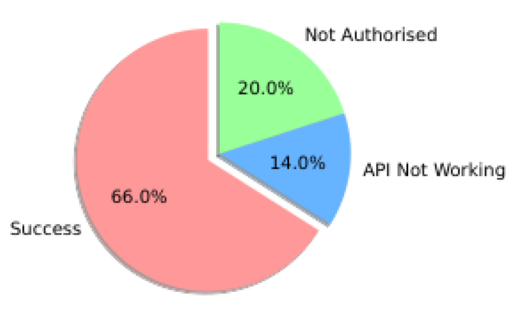

Figure displayed

4 Related Work
Tool Learning  Recent studies have shed light on the burgeoning capabilities of LLMs in mastering tools and making decisions within complex environments (Vemprala et al., 2023; Nakano et al., 2021; Qin et al., 2023a; Shen et al., 2023; Wu et al., 2023; Schick et al., 2023; Hao et al., 2023; Qian et al., 2023; Song et al., 2023; Zhuang et al., 2023; Gao et al., 2023).
Gaining access to external tools endows LLMs with real-time factual knowledge (Yang et al., 2023), multimodal functionalities (Gupta & Kembhavi, 2023), and specialized skills in vertical domains (Jin et al., 2023). However, open-source LLMs still lag far behind SOTA LLMs in tool use, and how tool-use ability is acquired by SOTA LLMs remains unclear. In this paper, we aim to bridge this gap and fathom the underlying mechanism.

Instruction Tuning  Instruction tuning enhances LLMs in understanding human instructions and generating proper responses (Wei et al., 2021; Bach et al., 2022; Mishra 

In [ ]:
output = agent_executor.invoke({"input": "'ToolLLM(2307.16789)' paper에서 DFSDT 진행 과정에 대해 그림과 함께 설명해줘. 한글로 대답해줘"})

In [5]:
pprint(output['output'])

('DFSDT(Decision Feedback Selection Decision Tree)는 Reflexion을 확장한 것으로, LLMs에게 '
 '다양한 추론 경로를 평가하고 가장 유망한 경로를 선택할 수 있게 합니다. 이 과정은 이전 실패를 반성하도록 하는 Reflexion을 보다 '
 '일반적인 방법으로 확장한 것입니다. DFSDT는 무한한 결정 공간을 가지는 일반적인 의사 결정 문제를 대상으로 하며, '
 'ToT(Tree-of-Thought) 추론과 유사한 아이디어를 공유하지만, 구현 세부 사항에서 상당한 차이가 있습니다. DFSDT는 '
 'ToT와 달리 무한한 결정 공간을 다루는 일반적인 문제를 대상으로 하며, ToT는 상대적으로 간단한 작업에 대해 brute-force '
 '검색으로 해결할 수 있는 작업(예: 24 게임 및 크로스워드)을 다룹니다.\n'
 '\n'
 '그림은 다음 경로에서 확인할 수 있습니다: '
 '[./papers_db/2403.07714/figs/toolbench_api_statistics.pdf](./papers_db/2403.07714/figs/toolbench_api_statistics.pdf)')


In [6]:
output

{'input': "'ToolLLM' paper에서 DFSDT 진행 과정에 대해 그림과 함께 설명해줘. 한글로 대답해줘",
 'output': 'DFSDT(Decision Feedback Selection Decision Tree)는 Reflexion을 확장한 것으로, LLMs에게 다양한 추론 경로를 평가하고 가장 유망한 경로를 선택할 수 있게 합니다. 이 과정은 이전 실패를 반성하도록 하는 Reflexion을 보다 일반적인 방법으로 확장한 것입니다. DFSDT는 무한한 결정 공간을 가지는 일반적인 의사 결정 문제를 대상으로 하며, ToT(Tree-of-Thought) 추론과 유사한 아이디어를 공유하지만, 구현 세부 사항에서 상당한 차이가 있습니다. DFSDT는 ToT와 달리 무한한 결정 공간을 다루는 일반적인 문제를 대상으로 하며, ToT는 상대적으로 간단한 작업에 대해 brute-force 검색으로 해결할 수 있는 작업(예: 24 게임 및 크로스워드)을 다룹니다.\n\n그림은 다음 경로에서 확인할 수 있습니다: [./papers_db/2403.07714/figs/toolbench_api_statistics.pdf](./papers_db/2403.07714/figs/toolbench_api_statistics.pdf)'}

In [7]:
output = agent_executor.invoke({"input": "'DDPM' paper에서 sampling이 어떻게 이루어지는지 수식과 함께 설명해줘, 한글로 말해줘"})



> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'title': 'DDPM'}`


Here is the title and section of the paper in HTML
title
An Edit Friendly DDPM Noise Space:
Inversion and Manipulations
sections
          Abstract
  1 Introduction
  2 Related work
    2.1 Inversion of diffusion models
    2.2 Image editing using diffusion models
  3 The DDPM noise space
  4 Edit friendly inversion
  5 Properties of the edit-friendly noise space
      Image shifting
      Color manipulations
      Text-Guided Image Editing
  6 Experiments
      Implementation details
      Datasets
      Metrics
      Comparisons on the modified ImageNet-R-TI2I dataset
      Comparisons on the modified Zero-Shot I2IT dataset
  7 Conclusion
  References
  Appendix A Shifting the latent code
  Appendix B CycleDiffusion
  Appendix C The effects of the skip and the strength parameters
  Appendix D Additional details on experiments and further numerical evaluation
    D.1 Experiments on the modified I

In [9]:
pprint(output['output'])

('DDPM 노이즈 공간에서 샘플링은 화이트 가우시안 노이즈로 변환되는 확산 과정을 역으로 시도함으로써 이루어집니다. 이 확산 과정은 다음과 '
 '같이 표현됩니다:\n'
 '\n'
 '1. 먼저, 확산 과정은 다음과 같은 식으로 표현됩니다:\n'
 '   xt = sqrt(1 - βt) * xt-1 + sqrt(βt) * nt, t = 1, ..., T\n'
 '\n'
 '2. 이 확산 과정은 동등하게 다음과 같이 표현될 수 있습니다:\n'
 '   xt = sqrt(α¯t) * x0 + sqrt(1 - α¯t) * ϵt\n'
 '\n'
 '3. 생성(역) 확산 과정은 무작위 노이즈 벡터 xT로부터 시작하여 반복적으로 다음 잡음 벡터를 추출하는 과정으로 나타낼 수 있습니다:\n'
 '   xt-1 = μ^t(xt) + σt * zt, t = T, ..., 1\n'
 '\n'
 '여기서, μ^t(xt)는 예측된 x0, P(ft(xt))는 예측된 x0, D(ft(xt))는 xt를 가리키는 방향을 나타냅니다. 또한, '
 '분산 일정은 σt = η * βt * (1 - α¯t-1) / (1 - α¯t)로 설정됩니다. 이 생성 과정은 텍스트나 클래스에 의해 '
 '조건이 부여될 수 있으며, 미리 훈련된 분류기나 CLIP 모델을 활용하여 조건을 부여할 수도 있습니다. 이러한 과정을 통해 생성된 '
 '벡터들은 이미지 x0을 고유하게 결정하며, 우리는 이를 모델의 잠재 코드로 간주합니다.')




> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'title': 'DDPM', 'show_figure': True}`


Here is the title and section of the paper in HTML
title
An Edit Friendly DDPM Noise Space:
Inversion and Manipulations
sections
          Abstract
  1 Introduction
  2 Related work
    2.1 Inversion of diffusion models
    2.2 Image editing using diffusion models
  3 The DDPM noise space
  4 Edit friendly inversion
  5 Properties of the edit-friendly noise space
      Image shifting
      Color manipulations
      Text-Guided Image Editing
  6 Experiments
      Implementation details
      Datasets
      Metrics
      Comparisons on the modified ImageNet-R-TI2I dataset
      Comparisons on the modified Zero-Shot I2IT dataset
  7 Conclusion
  References
  Appendix A Shifting the latent code
  Appendix B CycleDiffusion
  Appendix C The effects of the skip and the strength parameters
  Appendix D Additional details on experiments and further numerical evaluation
    D.1 Experime

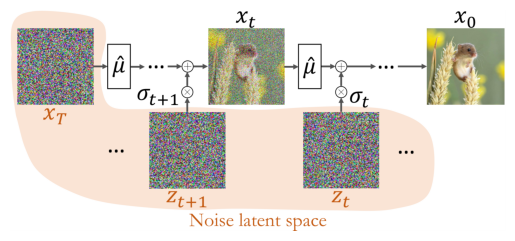

Figure displayed

3 The DDPM noise space
Here we focus on the DDPM sampling scheme, which is applicable in both pixel space [8] and latent space [21]. DDPM draws samples by attempting to reverse a diffusion process that gradually turns a clean image x0subscript𝑥0x_{0} into white Gaussian noise,

xt=1−βt​xt−1+βt​nt,t=1,…,T,formulae-sequencesubscript𝑥𝑡1subscript𝛽𝑡subscript𝑥𝑡1subscript𝛽𝑡subscript𝑛𝑡𝑡1…𝑇x_{t}=\sqrt{1-\beta_{t}}x_{t-1}+\sqrt{\beta_{t}}\,n_{t},\quad t=1,\ldots,T,

(1)

where {nt}subscript𝑛𝑡\{n_{t}\} are iid standard normal vectors and {βt}subscript𝛽𝑡\{\beta_{t}\} is some variance schedule. This diffusion process can be equivalently expressed as

xt=α¯t​x0+1−α¯t​ϵt,subscript𝑥𝑡subscript¯𝛼𝑡subscript𝑥01subscript¯𝛼𝑡subscriptitalic-ϵ𝑡x_{t}=\sqrt{\bar{\alpha}_{t}}x_{0}+\sqrt{1-\bar{\alpha}_{t}}\,\epsilon_{t},

(2)

where αt=1−βtsubscript𝛼𝑡1subscript𝛽𝑡\alpha_{t}=1-\beta_{t}, α¯t=∏s=1tαssubscript¯𝛼𝑡superscriptsubscriptproduct𝑠1𝑡subscript𝛼𝑠\bar{\alpha}_{t}=\prod_{s=1}^{t}\alpha_{s}, an

In [8]:
output = agent_executor.invoke({"input": "'DDPM' paper에서 sampling이 어떻게 이루어지는지 그림과 함께 설명해줘, 한글로 설명해줘"})

In [11]:
pprint(output['output'])

('DDPM 노이즈 공간에서 샘플링은 화이트 가우시안 노이즈로 변환되는 확산 과정을 역으로 시도하여 샘플을 추출합니다. 이 확산 과정은 '
 '다음과 같이 표현될 수 있습니다:\n'
 '\n'
 '- 확산 과정: \n'
 '  - xt = √(1-βt)xt-1 + √(βt)nt, t=1,...,T\n'
 '  - 이는 등가적으로 다음과 같이 표현될 수 있습니다:\n'
 '    - xt = √(α¯t)x0 + √(1-α¯t)ϵt\n'
 '  - 여기서 αt=1-βt, α¯t=∏s=1tαs, ϵt∼𝒩\u200b(0,𝑰)입니다.\n'
 '\n'
 '이 생성적(역) 확산 과정은 무작위 노이즈 벡터 xT∼𝒩\u200b(0,𝐈)에서 시작하여 반복적으로 denoising을 수행합니다. 이 '
 '과정은 다음과 같이 표현됩니다:\n'
 '\n'
 '- denoising 과정:\n'
 '  - xt-1 = μ^t(xt) + σtzt, t=T,...,1\n'
 '  - 여기서 μ^t(xt)와 D(ft(xt))는 특정 함수들을 나타냅니다.\n'
 '\n'
 '이러한 과정을 통해 이미지 x0를 생성하는 노이즈 벡터들을 추출할 수 있습니다. 이러한 노이즈 벡터들은 모델의 잠재 코드로 간주되며, '
 '주어진 실제 이미지 x0에 대해 일관된 노이즈 벡터를 추출하는 것이 관심사입니다.\n'
 '\n'
 '아래는 샘플링 과정을 보여주는 그림이 제공됩니다:\n'
 '- [DDPM Sampling '
 'Process](./papers_db/ICCV23_submission/figures/DDPM_sampling_process.pdf)')


In [13]:
pprint(output['output'].split(']')[-1].split('(')[-1].split(')')[0])

'./papers_db/2403.07714/figs/solvable_pass_rate.pdf'




> Entering new AgentExecutor chain...

Invoking: `loadpaper` with `{'title': 'ToolBench', 'show_figure': True}`


Here is the title and section of the paper in HTML
title
ToolLLM: Facilitating Large Language Models to Master 16000+ Real-world APIs
sections
          Abstract
  1 Introduction
  2 Dataset Construction
    2.1 API Collection
    2.2 Instruction Generation
    2.3 Solution Path Annotation
  3 Experiments
    3.1 Preliminary Experiments
    3.2 Main Experiments
    3.3 Out-of-Distribution (OOD) Generalization to APIBench (Patil et al., 2023)
  4 Related Work
  5 Conclusion
  References
  Appendix
  Appendix A Implementation Details
    A.1 Details for Filtering RapidAPI
    A.2 API Response Compression
    A.3 Details for Training ToolLLaMA
    A.4 Details for DFSDT
    A.5 Details for ToolEval
      Details for Pass Rate
      Details for Win Rate
      Comparing Human Evaluation and ToolEval
    A.6 Details for Experiments on APIBench
    A.7 Prompts for Instruction Gen

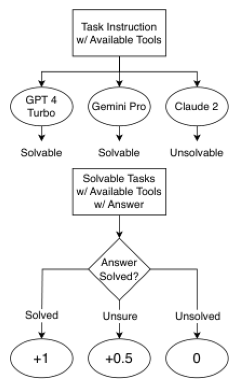

Figure displayed
Details for Pass Rate
To assess whether a solution path completes the tasks outlined in the original instruction and successfully passes it, we need to first consider the solvability of the instruction. In principle, an instruction can be classified as either (1) solvable: for example, at least one of the provided tools is potentially helpful in solving the original instruction; or (2) unsolvable: for example, all APIs are irrelevant to the instruction or the instruction provides invalid information such as invalid email address.

To determine whether a solution path is deemed passed or not, we need to consider whether the instruction is solvable or unsolvable. In our evaluation, three types of labels can be given to each solution path, i.e., Pass, Fail, and Unsure. Specifically, we define different rules as follows:

If the instruction is solvable:

1.

If the model gives finish type “Finish by Giving Up”,

(a)

After trying all the APIs extensively during and receivi

In [12]:
output = agent_executor.invoke({"input": "'ToolBench' 논문에서 소개한 Pass Rate evaluation 방법에 대해서 그림과 함께 설명해줘' 한글로 말해줘"})

In [14]:
pprint(output['output'])

('Pass Rate 평가 방법은 해결 경로가 원래 지시에 명시된 작업을 완료하고 성공적으로 통과하는지를 평가하기 위해 사용됩니다. 먼저 '
 '지시의 해결 가능성을 고려해야 합니다. 원칙적으로 지시는 (1) 해결 가능: 예를 들어, 제공된 도구 중 적어도 하나가 원래 지시를 '
 '해결하는 데 도움이 될 수 있는 경우 또는 (2) 해결 불가: 예를 들어, 모든 API가 지시와 관련이 없거나 지시가 잘못된 이메일 '
 '주소와 같은 잘못된 정보를 제공하는 경우로 분류될 수 있습니다.\n'
 '\n'
 '해결 경로가 통과되었는지 여부를 결정하려면 지시가 해결 가능한지 또는 해결 불가능한지를 고려해야 합니다. 우리의 평가에서 각 해결 경로에 '
 '세 가지 유형의 레이블을 부여할 수 있습니다. 즉, Pass, Fail 및 Unsure로 정의됩니다. 구체적으로 다음과 같은 규칙을 '
 '정의합니다:\n'
 '\n'
 '1. 지시가 해결 가능한 경우:\n'
 '   - 모델이 "포기로 종료" 유형을 제공한 경우,\n'
 '     - 모든 API를 철저히 시도한 후에도 API에서 유용한 정보를 받지 못하면 해결 경로는 통과로 간주됩니다.\n'
 '     - 모델이 몇 가지 API를 호출하거나 API에서 유효한 정보를 받지 못한 경우 해결 경로는 실패로 간주됩니다.\n'
 '   - 모델이 "최종 답변으로 종료" 유형을 제공한 경우,\n'
 '     - API가 유효한 정보를 제공하지 않고 모델이 모든 API를 시도하여도 최종 답변이 원래 지시를 해결하지 않거나 거부를 '
 '전달하는 경우 해결 경로는 통과로 간주됩니다.\n'
 '     - 도구가 유효한 정보를 제공하고 최종 답변이 지시를 완전히 해결하지 않거나 거부하는 경우 해결 경로는 실패로 간주됩니다.\n'
 '     - 최종 답변이 원래 지시를 완전히 해결하는 경우 해결 경로는 통과로 간주됩니다.\n'
 '     - 최종 답변의 내용을 기반으로 지시가 해결되었는지 판단할 수 없는 경우 해결 경로는 Un

In [13]:
pprint(output['output'].split(']')[-1].split('(')[-1].split(')')[0])

'./papers_db/ICCV23_submission/figures/DDPM_sampling_process.pdf'


In [12]:
'./papers_db/2302.05259v3.tar.gz'.split('.')

['', '/papers_db/2302', '05259v3', 'tar', 'gz']

In [15]:
'''아래는 그림과 함께 제공된 내용입니다:
{figure_path : ./papers_db/ICCV23_submission/figures/DDPM_inversion_variability_1.pdf}'''.split('}')[0].split("{}")

'아래는 그림과 함께 제공된 내용입니다:\n{figure_path : ./papers_db/ICCV23_submission/figures/DDPM_inversion_variability_1.pdf'